In [2]:
import datetime as dt
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web

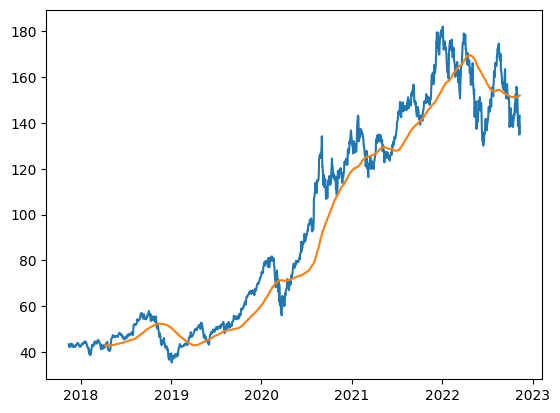

In [5]:
stock = input("Enter a stock ticker: ")

data = web.DataReader(stock, "yahoo")
data

data['SMA_100'] = ta.SMA(data['Close'], 100)
data.iloc[100:]

plt.plot(data['Close'])
plt.plot(data['SMA_100'])